In [ ]:
import numpy as numpy
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt




Importation des données 

In [30]:
df = pd.read_csv('creditcard.csv')
df.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Visualisation des données 

Class
0    99.827251
1     0.172749
Name: proportion, dtype: float64


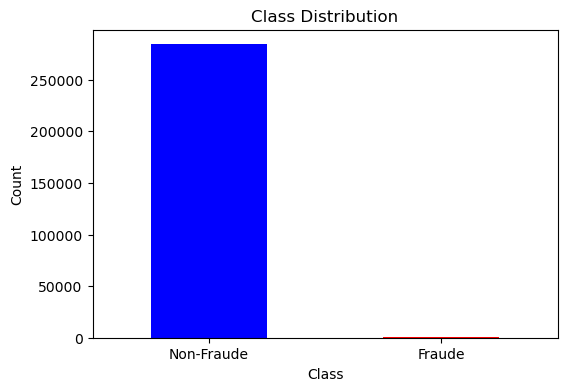

In [29]:
print(df['Class'].value_counts(normalize=True)*100)
class_counts = y.value_counts()
class_labels = ['Non-Fraude', 'Fraude']
plt.figure(figsize=(6, 4))
class_counts.plot(kind='bar', color=['blue', 'red'])
plt.title('Class Distribution')
plt.xticks(ticks=[0, 1], labels=class_labels, rotation=0)
plt.ylabel('Count')
plt.show()


In [10]:
df.drop(['Time'], axis=1, inplace=True)


C:\Users\schne\AppData\Local\Temp\ipykernel_8420\25565755.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df[column], orient='h', ax=axs[i], palette=[palette[i]], linewidth=2.5)
C:\Users\schne\AppData\Local\Temp\ipykernel_8420\25565755.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df[column], orient='h', ax=axs[i], palette=[palette[i]], linewidth=2.5)
C:\Users\schne\AppData\Local\Temp\ipykernel_8420\25565755.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df[column], orient='h', ax=axs[i], palette=[palette[i]]

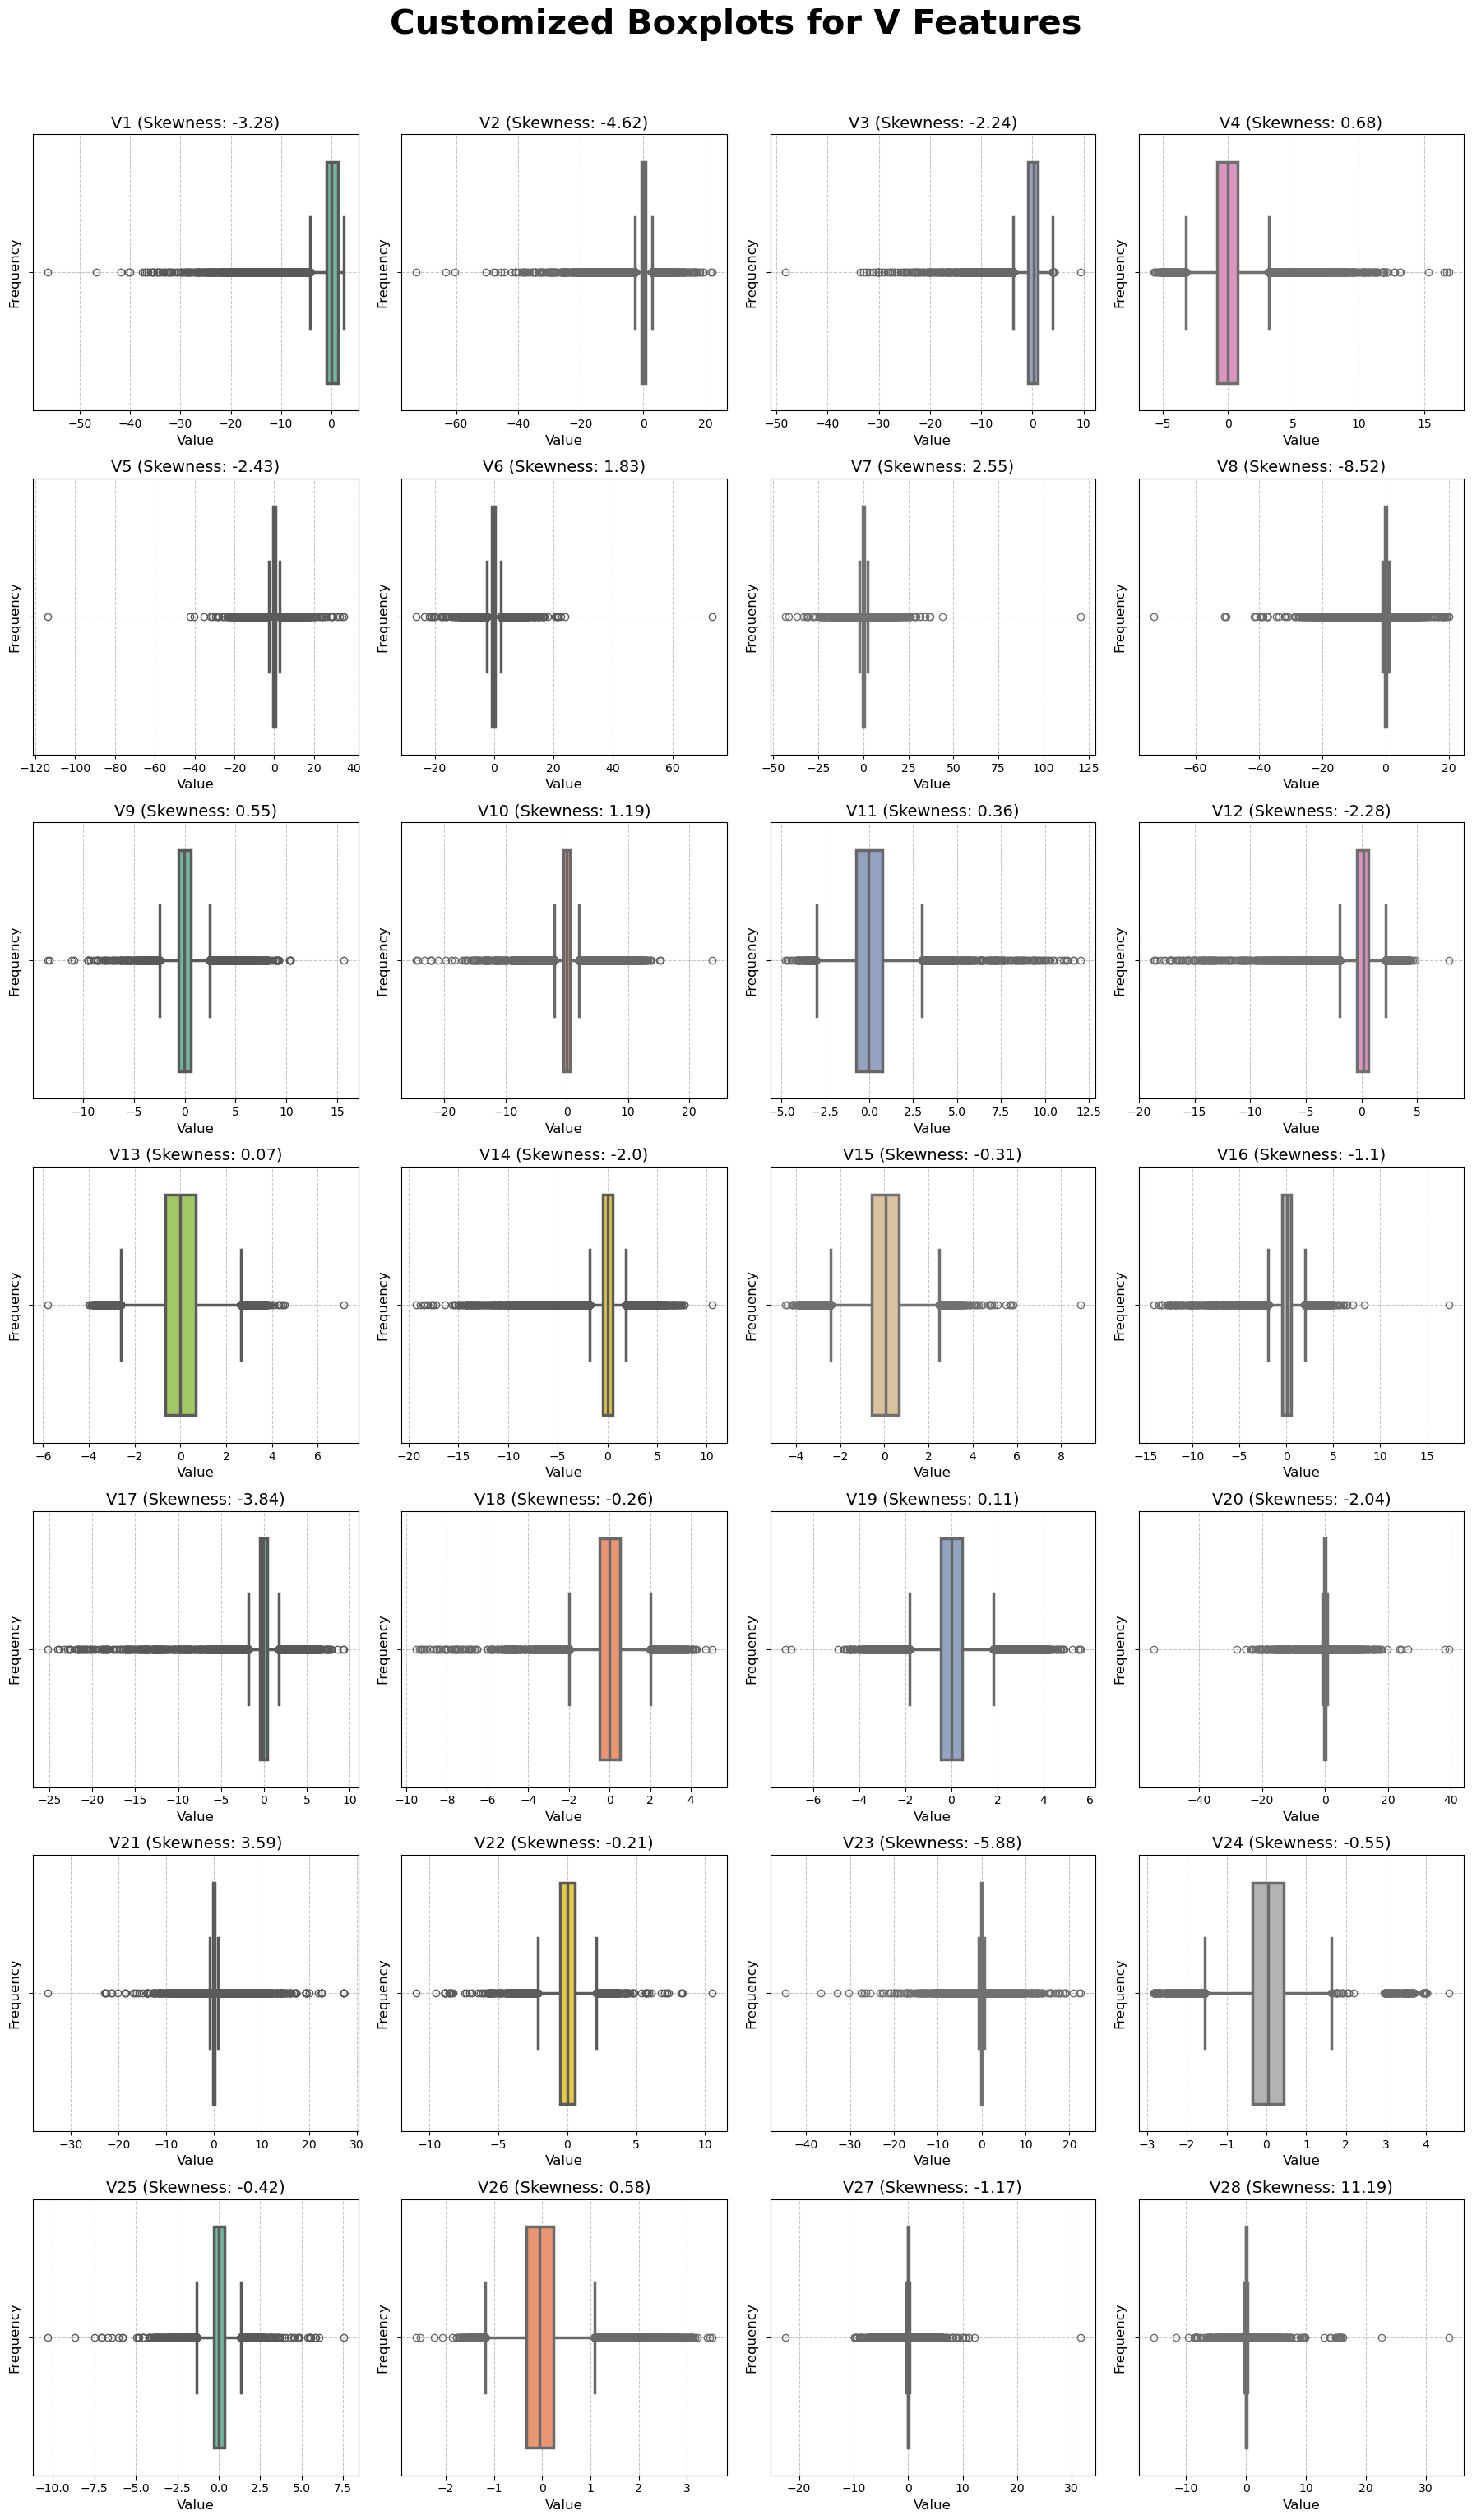

In [34]:


def plot_boxplots(df, columns, rows, cols, title):
    # Créer la grille de sous-graphes avec une taille ajustée
    fig, axs = plt.subplots(rows, cols, figsize=(18, 30))
    fig.suptitle(title, fontsize=30, fontweight='bold', y=1.02)

    # Aplatir la matrice d'axes pour faciliter l'accès
    axs = axs.flatten()

    # Palette de couleurs pour chaque boxplot
    palette = sns.color_palette("Set2", len(columns))

    # Affichage des boxplots pour chaque colonne
    for i, column in enumerate(columns):
        sns.boxplot(data=df[column], orient='h', ax=axs[i], palette=[palette[i]], linewidth=2.5)
        
        # Calcul de l'asymétrie (skewness)
        skewness = round(df[column].skew(), 2)
        axs[i].set_title(f'{column} (Skewness: {skewness})', fontsize=14)
        axs[i].set_xlabel('Value', fontsize=12)
        axs[i].set_ylabel('Frequency', fontsize=12)
        axs[i].grid(True, linestyle='--', alpha=0.7)

    # Supprimer les axes inutilisés si la grille est plus grande que le nombre de graphiques
    for j in range(len(columns), len(axs)):
        fig.delaxes(axs[j])

    # Ajuster la mise en page pour éviter les chevauchements
    plt.tight_layout()
    plt.show()

# Exécution avec les variables commençant par 'V'
v_features = [col for col in df.columns if col.startswith('V')]
plot_boxplots(df, v_features, rows=7, cols=4, title='Customized Boxplots for V Features')



In [18]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
X = df.drop(columns=["Class"])
y = df["Class"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)  # Appliquer SMOTE pour sur-échantillonner la classe minoritaire

Essayons différents modèles de machine learning

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, GradientBoostingClassifier, BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression



models = {
    'AdaBoostClassifier': AdaBoostClassifier(random_state=0),
    'DecisionTreeClassifier': DecisionTreeClassifier(random_state=0),
    'RandomForestClassifier': RandomForestClassifier(random_state=0),
    'SVC': SVC(random_state=0),
    'KNeighborsClassifier': KNeighborsClassifier(),
    'LogisticRegression': LogisticRegression(random_state=0),
    'GradientBoostingClassifier': GradientBoostingClassifier(random_state=0),
    'BaggingClassifier': BaggingClassifier(estimator=DecisionTreeClassifier(random_state=0), n_estimators=100),
   
}

# Création d'une fonction pour construire un pipeline et évaluer un modèle
def evaluate_model(name, model, X_train_res, y_train_res):
    pipeline = Pipeline([
        ('scaler', StandardScaler()),   # Normalisation des données
        ('classifier', model)          # Modèle de classification
    ])
    
    # Validation croisée
    score = cross_val_score(pipeline, X_train, y_train, cv=2, scoring='accuracy').mean() * 100
    print(f'- {name} : {score:.2f} %')

# Itération sur les modèles et évaluation
print("Résultats des modèles avec pipeline :\n")
for name, model in models.items():
    evaluate_model(name, model, X_train, y_train)


Résultats des modèles avec pipeline :



c:\Users\schne\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\schne\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


- AdaBoostClassifier : 99.91 %
- DecisionTreeClassifier : 99.83 %
- RandomForestClassifier : 99.93 %
- SVC : 99.87 %
- KNeighborsClassifier : 99.91 %
- LogisticRegression : 99.91 %
- GradientBoostingClassifier : 99.86 %
- BaggingClassifier : 99.92 %


Interessons nous aux modèles avec les meilleurs résultats

LogisticRegression

c:\Users\schne\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Accuracy: 0.9812

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99     56864
           1       0.08      0.90      0.14        98

    accuracy                           0.98     56962
   macro avg       0.54      0.94      0.57     56962
weighted avg       1.00      0.98      0.99     56962


ROC-AUC Score: 0.9396591078750016


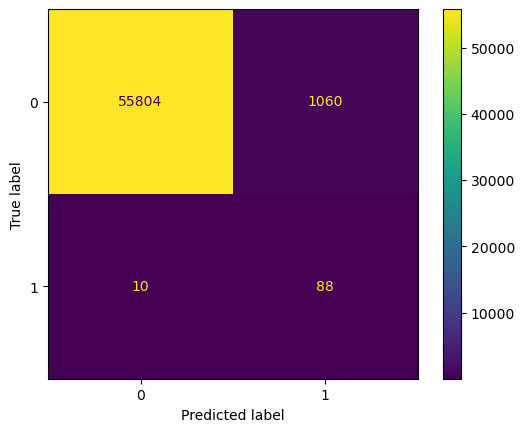

In [31]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
from sklearn.metrics import ConfusionMatrixDisplay
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train_res, y_train_res)

y_pred = log_reg.predict(X_test)

accuracy_log_reg = accuracy_score(y_test, y_pred)
print(f"Logistic Regression Accuracy: {accuracy_log_reg:.4f}\n")

print("Classification Report:\n", classification_report(y_test, y_pred))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred);
print("\nROC-AUC Score:", roc_auc_score(y_test, y_pred))

RandomForest

Random Forest Accuracy: 0.9995

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.87      0.85      0.86        98

    accuracy                           1.00     56962
   macro avg       0.94      0.92      0.93     56962
weighted avg       1.00      1.00      1.00     56962

ROC-AUC Score: 0.9233638728423278


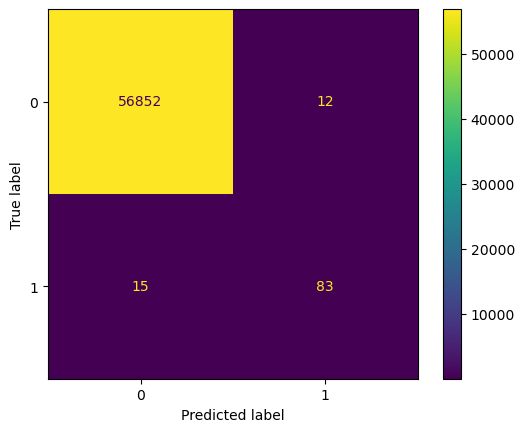

In [32]:
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train_res, y_train_res)

y_pred = rf_clf.predict(X_test)

accuracy_rf = accuracy_score(y_test, y_pred)
print(f"Random Forest Accuracy: {accuracy_rf:.4f}\n")

print("Classification Report:\n", classification_report(y_test, y_pred))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred);
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred))

Conclusion des modèles étudiés :


Logistic Regression : - Ce modèle a de tres bonne performance globale(99.1%).
-Pour les transactions non frauduleuses on a  que le modèle a correctement prédit toutes les transactions non frauduleuses, et le rappel nous montre que presque toutes les transactions non frauduleuses ont été détectées sans erreurs(98%).
Pour les fraudes on a un taux de prédiction de 8%,  le modèle classe de nombreuses transactions non frauduleuses comme frauduleuses, et le rappel de 90% nous montre que le modèle détecte environ 90% des fraudes réelles.
Néanmoins la faible valeur du f1-score montre qu'il y a un déséquilibre entre la précision et le rappel pour cette classe.
-Le score ROC-AUC de 94% indique que le modèle est assez performant pour distinguer les classes, bien séparer les fraudes des non-fraudes.


Random Forest : - Ce modèle a de tres bonne performance globale(99.3%).
-Pour les transactions non frauduleuses on a  que le modèle a correctement prédit toutes les transactions non frauduleuses, et le rappel nous montre que toutes les transactions non frauduleuses ont été détectées sans erreurs.
Pour les fraudes on a un taux de prédiction de 87%, il a donc parfois des transactions non frauduleuses comme frauduleuses, et le rappel de 0.85 nous montre que le modèle détecte environ 85% des fraudes réelles.
Le f1 score est de 0.86, cela montre qu' il y a un bon compromis entre précision et rappel.
-Le score ROC-AUC de 0.92 indique que le modèle est assez performant pour distinguer les classes, bien distinguer les fraudes des non-fraudes.
